 # Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python
import gym

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.colors as color
%matplotlib inline
%load_ext autoreload
%autoreload 

In [2]:
#!pip -q install ./python

In [3]:
#!python -m pip install --upgrade pip

In [4]:
import cv2


In [5]:
from unityagents import UnityEnvironment
import numpy as np


In [6]:
#!python -m ipykernel install --user --name drlnd --display-name "drlnd"


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [7]:
# please do not modify the line below
path = r"C:\Users\CAP Lab\Desktop\Adithya Mohan CAP_LAB\Research\RL\gym\unity\banana-visual\VisualBanana_Windows_x86_64\Banana.exe"
env = UnityEnvironment(file_name=path)
# env = UnityEnvironment(file_name="C:\Reinforcement\Banana\deep-reinforcement-learning\p1_navigation\Banana_Windows_x86_64\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States have shape: (1, 84, 84, 3)
(1, 84, 84, 3)


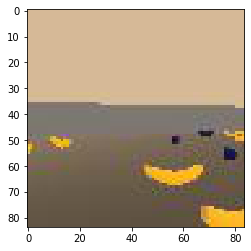

float64 <class 'numpy.ndarray'>
(1, 84, 84)
torch.Size([84, 84, 3]) (84, 84, 3) (1, 84, 84, 3) (84, 84, 3)


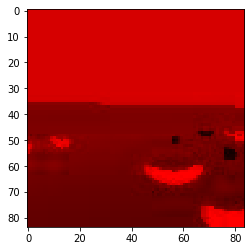

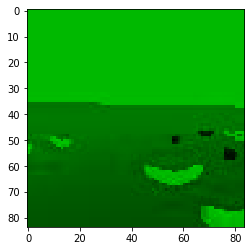

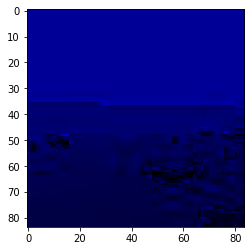

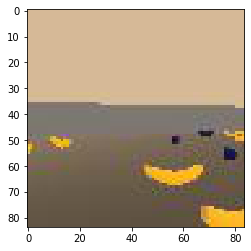

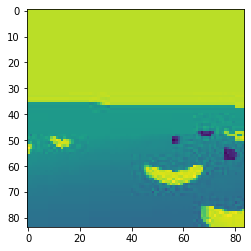

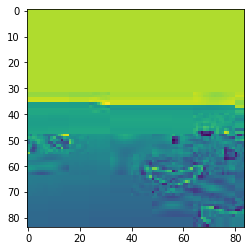

img_out (84, 84, 3)
(84, 84, 3) this one  (84, 84)


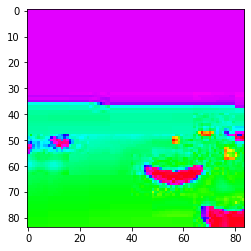

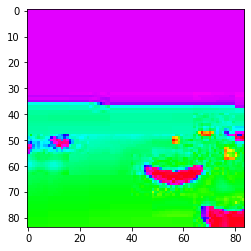

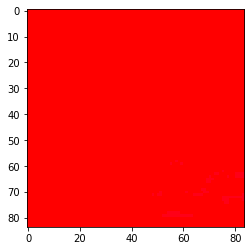

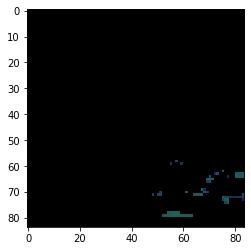

In [14]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States have shape:', state.shape)
state_size = state.shape
print(state_size)
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print(state.dtype , type(state))
state_Type = type(state)
print(state[:,:,:,1].shape)
torchState = torch.from_numpy(state)
print(torchState.view(84,84,3).size() , np.shape(np.squeeze(state)) ,np.shape(torchState.data.numpy()), np.shape(np.squeeze(state)) )
G = np.squeeze(state)[:,:,1]
B = np.squeeze(state)[:,:,2]
R = np.squeeze(state)[:,:,0]
temp = np.zeros(np.shape(np.squeeze(state)), dtype='float')
temp[:,:,0,] = np.squeeze(state)[:,:,0,]
plt.imshow(temp)
plt.show()
temp = np.zeros(np.shape(np.squeeze(state)), dtype='float')
temp[:,:,1,] = G
plt.imshow(temp)
plt.show()
temp = np.zeros(np.shape(np.squeeze(state)), dtype='float')
temp[:,:,2,] = B
plt.imshow(temp)
plt.show()
plt.imshow(torchState.view(84,84,3))
plt.show()
lumin = extract_luminance(np.squeeze(state))
plt.imshow(lumin)
plt.show()
lumin = scale_lumininance(np.squeeze(state))
plt.imshow(lumin)
plt.show()
img_out = np.copy(np.squeeze(state))
print("img_out" , np.shape(img_out))
#img_out = np.reshape(img_out, (3,84,84))
imghsv  = color.rgb_to_hsv(img_out)
img_cv = img_out * 255
img_cv = img_cv.astype(np.uint8)
img_cv_hsv = cv2.cvtColor(img_cv , cv2.COLOR_RGB2HSV)
print(np.shape(img_cv_hsv) , "this one " , np.shape(imghsv[:,:,0]))
plt.imshow(imghsv[:,:,2], cmap='hsv')
plt.show()
plt.imshow(img_cv_hsv[:,:,2], cmap='hsv')
plt.show()
lower_yellow = np.array([25,30,81])
upper_yellow = np.array([40,100,100])

mask = cv2.inRange(img_cv_hsv, lower_yellow, upper_yellow)
res = cv2.bitwise_and(img_cv_hsv,img_cv_hsv, mask= mask)
plt.imshow(mask , cmap = "hsv")
plt.show()
plt.imshow(res , cmap = "hsv")
plt.show()


In [15]:
def extract_luminance(image):
    luminance = np.sqrt(0.299*np.power(image[:,:,0],2) + 0.587*np.power(image[:,:,1],2) + 0.114*np.power(image[:,:,2],2))
    return luminance
def scale_lumininance(img):
    return np.dot(img[...,:3], [0.2126, 0.0152, 0.722])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [16]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    #print(len(next_state))
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


In [17]:
import numpy as np
import random
from collections import namedtuple, deque
from queue import PriorityQueue

from model import QNetwork
from model import QNetworkCNN
from torch.autograd import Variable

import torch
import torch.nn.functional as F
import torch.optim as optim

In [18]:
import torchvision.transforms as transforms

In [19]:
BUFFER_SIZE = int(1e4)  # replay buffer size
BATCH_SIZE = 16       # minibatch size
GAMMA = 0.99           # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 8e-4               # learning rate 

WeightDecay = 1e-4

UPDATE_EVERY = 1      # how often to update the network
N_Update_per = 1 # no of updates per time

Momentum = 0.9  
Epislon = 0.99
min_Epislon = 0.001

Decay = 0.99
MaxBeta = 1
MinBeta = 0


ALPHA = 0.5
ALPHA2 = 1
ALPHA_min = 0.01
Alphadecay = 0.999 
ErrorOffset = 0.01
min_beta = 0.3

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device which is used is " , device)
print("cuda available", torch.cuda.is_available())
#a = torch.cuda.FloatTensor([1.])
b = torch.tensor([ 1.], device='cuda:0')


Device which is used is  cuda:0
cuda available True


In [17]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device which is used is " , device)

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, state_type,seed ,  visual = False):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
            Beta is for sacling down the weights update due to the Priority Queues
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.Beta = 1
        self.Gamma = GAMMA

        # Q-Network
        if(not visual):
            self.qnetwork_local = QNetwork(state_size, action_size, seed ).to(device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed ).to(device)
        else:
            self.qnetwork_local = QNetworkCNN(state_size, action_size, seed , augment_frames = 3).to(device)
            self.qnetwork_target = QNetworkCNN(state_size, action_size, seed , augment_frames = 3).to(device)
            
        
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR , weight_decay= WeightDecay)
        self.state_type = state_type
        # Replay memory
        #self.memory = PriorityReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,ALPHA,state_type, seed)
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        #Priority = self.getError(state, action, reward, next_state,done)
        #self.memory.add(state, action, reward, next_state, done,Priority)
        #self, state, action, reward, next_state, done
        self.memory.add(state, action, reward, next_state,done)
        global Epislon
        Epislon *= Decay
        if(Epislon < min_Epislon):
            Epislon = min_Epislon
        beta = 1 - Epislon
        #print(beta)
        # alpha value for priority buffer
        global ALPHA2
        ALPHA2 *= Alphadecay
        if(ALPHA2 < ALPHA_min):
            ALPHA2 = ALPHA_min
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                #uncomment this for priority buffer
                #experiences = self.memory.sample(ALPHA2,beta)
                for _ in range(N_Update_per):
                    experiences = self.memory.sample_idx()
                    self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        
        #state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        # if e is not None and e[1].done != True and 
        # self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1])
        if (len(self.memory.memory) >= 2 and (self.memory.memory[-1].done or self.memory.memory[-2].done) == False):
            #print(np.dtype(state), np.size(state))
            state = torch.from_numpy(np.array([self.memory.memory[-2].state,self.memory.memory[-1].state,state])).float().view(1,-1,84,84).to(device)
            
            self.qnetwork_local.eval()
            #print(np.size(state))
            with torch.no_grad():
                action_values = self.qnetwork_local(state)
            #print(action_values)
            self.qnetwork_local.train()
            #for debuging
            #check =    random.choice(np.arange(self.action_size))
            #check2 = np.argmax(action_values.cpu().data.numpy())
            #print(check.dtype , check2.dtype)
            # Epsilon-greedy action selection
            if random.random() > eps:
                return np.argmax(action_values.cpu().data.numpy() , )
            else:
                return random.choice(np.arange(self.action_size))
        else:
            return random.choice(np.arange(self.action_size))
            
                   

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        
        
        #states, actions, rewards, next_states, dones, weights = experiences
        states, actions, rewards, next_states, dones = experiences
        #print(states.size())
        size_now = states.size()
        states = states.view(size_now[0] , -1 , 84 , 84)
        next_states = next_states.view(size_now[0] , -1 , 84 , 84)
        # Get max predicted Q values (for next states) from target model
        #getting the maximum action from the Q table and applying it in the 
        #print("states size" , next_states.size())
        #------this for DDQN ---- uncomment this for DDQN-------------------------
        Q_targets_next_action = self.qnetwork_local(next_states).detach().argmax(1).unsqueeze(1)
        #print(Q_targets_next_action)
        Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
        Q_targets_next = Q_targets_next.detach()
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)
        #print("expected" , Q_expected , Q_targets)
        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # change reduce to False for priority buffer
        
        #loss = F.smooth_l1_loss(Q_expected, Q_targets)
        #print(loss.size())
        
        # this removed due to the swtching to normal replay buffer
        #loss = loss * (weights).detach()
        #loss = torch.mean(loss)
        #loss has to be scaled scaled down by weights = (1 /(N*p(i)))^Beta
        #loss = F.l1_loss(Q_expected , Q_targets)
        
        #print("The Loss", loss)
        # Minimize the loss
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        
        

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
#         ##-- for updating the priorities in the experience replay buffer------###
#         with torch.no_grad():
#             Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
#             #print(Q_targets_next_action)
#             Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
#             Q_targets_next = Q_targets_next.detach()
#             # Compute Q targets for current states 
#             Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)).detach()

#             # Get expected Q values from local model
#             Q_expected = self.qnetwork_local(states).gather(1, actions).detach()

#             errors = torch.abs(Q_expected - Q_targets).cpu().data.numpy()
#             self.memory.updatePriorities(errors)
        
        
        
    def ConvnumpyTotorch(self,states, actions, rewards, next_states, dones):
        # converts the numpy to tensor variables
        states = torch.from_numpy(np.array([states])).float().to(device)
        actions = torch.from_numpy(np.array([[actions]])).long().to(device)
        rewards = torch.from_numpy(np.array([rewards])).float().to(device)
        next_states = torch.from_numpy(np.array([next_states])).float().to(device)
        dones = torch.from_numpy(np.array([dones]).astype(np.uint8)).float().to(device)
        return states, actions, rewards, next_states, dones
        
    def getError(self,states, actions, rewards, next_states, dones):
        
        with torch.no_grad():
            #print("states" , states.shape , next_states.shape)
            states, actions, rewards, next_states, dones = self.ConvnumpyTotorch(states, actions, rewards, next_states, dones)
            #print("states",states , next_states)
            Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
            #print("actions",Q_targets_next_action , actions)
            #print(next_states.shape)
            Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
            Q_targets_next = Q_targets_next.detach()
            # Compute Q targets for current states 
            Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))

            # Get expected Q values from local model

            Q_expected = self.qnetwork_local(states).gather(1, actions)
            Q_expected = Q_expected.detach()
            #error =  F.l1_loss(Q_expected , Q_targets)
            error =  torch.abs(Q_expected - Q_targets).cpu().data.numpy()
        return (error.item() + ErrorOffset)
    
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.selectedIdx = np.array([])
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)
        #print(experiences[0])
        states = torch.from_numpy(np.stack([e.state for e in experiences if e is not None] , axis =0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.stack([e.next_state for e in experiences if e is not None], axis =0)).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)
    def sample_idx(self):
        index_value = random.sample(list(enumerate(self.memory)), k=self.batch_size)
        #print("batch", self.batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-2].state,self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-2].next_state, self.memory[e[0]-1].next_state ,e[1].next_state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def sample_idx_withBatch(self , batch_size):
        
        
        index_value = random.sample(list(enumerate(self.memory)), k=batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
        



    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    
class PriorityReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, alpha, state_type ,  seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.Prioritymemory = deque(maxlen=buffer_size) 
        self.batch_size = batch_size
        self.expType = [('state',state_type), ('action','float'),('reward','float'), ('next_state',state_type),('done','bool'),('Priority','float')]
        self.experienceMemory = np.array([], dtype = self.expType)
        self.seed = random.seed(seed)
        self.max_size = buffer_size
        self.alpha = alpha
        
    
    def add(self, state, action, reward, next_state, done, Priority):
        """Add a new experience to memory."""
        if(np.size(self.experienceMemory) > self.max_size):
            self.experienceMemory = np.delete(self.experienceMemory , 0 )
        e = (state, action, reward, next_state, done, Priority)
        exp = np.array([e] , dtype = self.expType)
        self.experienceMemory = np.append(self.experienceMemory , exp )
        #print("memory", np.shape(self.experienceMemory['state'][0]))
        #self.memory.append(e)
    
    def sample(self , alpha , beta):
        """ sample a batch of experiences from memory. based on the Priority"""
        # write ur own implementation
        self.alpha = alpha
        self.beta = beta
        if(self.beta < min_beta):
            self.beta = min_beta
        probs ,Choosenindex = self.Batchsample()
        self.selectedIdx = Choosenindex
        weights = (np.size(self.experienceMemory)* probs)**(-(self.beta))
        weights /= np.max(weights)
        weights = Variable(torch.from_numpy(np.vstack(weights)).float().to(device))
        states = Variable(torch.from_numpy(np.stack(self.experienceMemory['state'][Choosenindex] , axis =0)).float().to(device))
        #print("at sampling",states.size())
        actions = Variable(torch.from_numpy(np.vstack(self.experienceMemory['action'][Choosenindex])).long().to(device))
        rewards = Variable(torch.from_numpy(np.vstack(self.experienceMemory['reward'][Choosenindex])).float().to(device))
        next_states = Variable(torch.from_numpy(np.stack(self.experienceMemory['next_state'][Choosenindex] , axis =0)).float().to(device))
        dones = Variable(torch.from_numpy(np.vstack(self.experienceMemory['done'][Choosenindex]).astype(np.uint8)).float().to(device))
        
        
  
        return (states, actions, rewards, next_states, dones , weights)
    
    def Batchsample(self):
        """Samples the batch here """
        all_priorities = self.experienceMemory['Priority']
        probs = self.GetProbs(all_priorities)
        indeArr = np.arange(len(probs))
        Choosenindex = np.random.choice(indeArr, self.batch_size,p=probs, replace = False)
        return probs[Choosenindex] , Choosenindex
    
    def GetProbs(self, Pri):
        """ Probabilities are defiend here"""
        Numerator = np.power(Pri, self.alpha)
        Demoninator = np.sum(Numerator)
        Probs = Numerator / Demoninator
        return Probs
    
    def updatePriorities(self,Error):
        #print(self.selectedIdx , Error , np.size(Error) , np.size(self.selectedIdx))
        self.experienceMemory['Priority'][self.selectedIdx] = Error.flatten()
                                    
    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.experienceMemory)
    

Device which is used is  cuda:0


In [18]:
# print(np.shape(np.stack(agent.memory.experienceMemory['state'][np.array([1,2])], axis = 0) ))
# #this is where the issue is 
# ## debug block here 
# a = np.array(3)
# a =np.int64(a)
# print(a.dtype)
a  = [[i , i+2 ] for i in range(10)]
a

[[0, 2],
 [1, 3],
 [2, 4],
 [3, 5],
 [4, 6],
 [5, 7],
 [6, 8],
 [7, 9],
 [8, 10],
 [9, 11]]

In [19]:
#from dqn_agent import Agent
agent = Agent(state_size=(84, 84, 3), action_size=4, state_type = state_Type, visual = True, seed=0)

In [20]:
def extract_luminance_state(image):
    luminance = np.sqrt(0.299*np.power(image[:,:,0],2) + 0.587*np.power(image[:,:,1],2) + 0.114*np.power(image[:,:,2],2))

In [21]:


def dqn(n_episodes=3000, max_t=10000, eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start# initialize epsilon
    Max_t = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        s = np.squeeze(env_info.visual_observations[0])      
        state = np.resize(s , (3,84,84))
       
        score = 0
        #print("hello")
        for t in range(max_t):
            action = agent.act(state, eps)
            #print(action.dtype)
            action = np.int32(action)
            env_info = env.step(action)[brain_name]
            next_state = np.resize(env_info.visual_observations[0] , (3,84,84))
            #print(next_state.shape)
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                Max_t = t
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        print("Maxi" ,Max_t)
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=16.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            if np.mean(scores_window)>=16.0:
                break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 1	Average Score: 3.00Maxi 299
Episode 1	Average Score: 3.00
Episode 2	Average Score: 1.50Maxi 299
Episode 2	Average Score: 1.50
Episode 3	Average Score: 0.33Maxi 299
Episode 3	Average Score: 0.33
Episode 4	Average Score: 0.50Maxi 299
Episode 4	Average Score: 0.50
Episode 5	Average Score: 0.60Maxi 299
Episode 5	Average Score: 0.60
Episode 6	Average Score: 0.67Maxi 299
Episode 6	Average Score: 0.67
Episode 7	Average Score: 0.57Maxi 299
Episode 7	Average Score: 0.57
Episode 8	Average Score: 0.38Maxi 299
Episode 8	Average Score: 0.38
Episode 9	Average Score: 0.11Maxi 299
Episode 9	Average Score: 0.11
Episode 10	Average Score: 0.10Maxi 299
Episode 10	Average Score: 0.10
Episode 11	Average Score: 0.00Maxi 299
Episode 11	Average Score: 0.00
Episode 12	Average Score: -0.17Maxi 299
Episode 12	Average Score: -0.17
Episode 13	Average Score: -0.31Maxi 299
Episode 13	Average Score: -0.31
Episode 14	Average Score: -0.21Maxi 299
Episode 14	Average Score: -0.21
Episode 15	Average Score: -0.27M

Episode 118	Average Score: 0.18Maxi 299
Episode 118	Average Score: 0.18
Episode 119	Average Score: 0.19Maxi 299
Episode 119	Average Score: 0.19
Episode 120	Average Score: 0.20Maxi 299
Episode 120	Average Score: 0.20
Episode 121	Average Score: 0.20Maxi 299
Episode 121	Average Score: 0.20
Episode 122	Average Score: 0.21Maxi 299
Episode 122	Average Score: 0.21
Episode 123	Average Score: 0.21Maxi 299
Episode 123	Average Score: 0.21
Episode 124	Average Score: 0.15Maxi 299
Episode 124	Average Score: 0.15
Episode 125	Average Score: 0.13Maxi 299
Episode 125	Average Score: 0.13
Episode 126	Average Score: 0.11Maxi 299
Episode 126	Average Score: 0.11
Episode 127	Average Score: 0.11Maxi 299
Episode 127	Average Score: 0.11
Episode 128	Average Score: 0.10Maxi 299
Episode 128	Average Score: 0.10
Episode 129	Average Score: 0.11Maxi 299
Episode 129	Average Score: 0.11
Episode 130	Average Score: 0.10Maxi 299
Episode 130	Average Score: 0.10
Episode 131	Average Score: 0.10Maxi 299
Episode 131	Average Scor

Episode 232	Average Score: 0.46Maxi 299
Episode 232	Average Score: 0.46
Episode 233	Average Score: 0.45Maxi 299
Episode 233	Average Score: 0.45
Episode 234	Average Score: 0.44Maxi 299
Episode 234	Average Score: 0.44
Episode 235	Average Score: 0.41Maxi 299
Episode 235	Average Score: 0.41
Episode 236	Average Score: 0.45Maxi 299
Episode 236	Average Score: 0.45
Episode 237	Average Score: 0.43Maxi 299
Episode 237	Average Score: 0.43
Episode 238	Average Score: 0.44Maxi 299
Episode 238	Average Score: 0.44
Episode 239	Average Score: 0.45Maxi 299
Episode 239	Average Score: 0.45
Episode 240	Average Score: 0.44Maxi 299
Episode 240	Average Score: 0.44
Episode 241	Average Score: 0.46Maxi 299
Episode 241	Average Score: 0.46
Episode 242	Average Score: 0.45Maxi 299
Episode 242	Average Score: 0.45
Episode 243	Average Score: 0.46Maxi 299
Episode 243	Average Score: 0.46
Episode 244	Average Score: 0.44Maxi 299
Episode 244	Average Score: 0.44
Episode 245	Average Score: 0.45Maxi 299
Episode 245	Average Scor

Episode 346	Average Score: 0.42Maxi 299
Episode 346	Average Score: 0.42
Episode 347	Average Score: 0.40Maxi 299
Episode 347	Average Score: 0.40
Episode 348	Average Score: 0.38Maxi 299
Episode 348	Average Score: 0.38
Episode 349	Average Score: 0.38Maxi 299
Episode 349	Average Score: 0.38
Episode 350	Average Score: 0.37Maxi 299
Episode 350	Average Score: 0.37
Episode 351	Average Score: 0.40Maxi 299
Episode 351	Average Score: 0.40
Episode 352	Average Score: 0.38Maxi 299
Episode 352	Average Score: 0.38
Episode 353	Average Score: 0.40Maxi 299
Episode 353	Average Score: 0.40
Episode 354	Average Score: 0.41Maxi 299
Episode 354	Average Score: 0.41
Episode 355	Average Score: 0.41Maxi 299
Episode 355	Average Score: 0.41
Episode 356	Average Score: 0.41Maxi 299
Episode 356	Average Score: 0.41
Episode 357	Average Score: 0.40Maxi 299
Episode 357	Average Score: 0.40
Episode 358	Average Score: 0.41Maxi 299
Episode 358	Average Score: 0.41
Episode 359	Average Score: 0.41Maxi 299
Episode 359	Average Scor

Episode 460	Average Score: 0.50Maxi 299
Episode 460	Average Score: 0.50
Episode 461	Average Score: 0.50Maxi 299
Episode 461	Average Score: 0.50
Episode 462	Average Score: 0.52Maxi 299
Episode 462	Average Score: 0.52
Episode 463	Average Score: 0.56Maxi 299
Episode 463	Average Score: 0.56
Episode 464	Average Score: 0.56Maxi 299
Episode 464	Average Score: 0.56
Episode 465	Average Score: 0.59Maxi 299
Episode 465	Average Score: 0.59
Episode 466	Average Score: 0.58Maxi 299
Episode 466	Average Score: 0.58
Episode 467	Average Score: 0.60Maxi 299
Episode 467	Average Score: 0.60
Episode 468	Average Score: 0.63Maxi 299
Episode 468	Average Score: 0.63
Episode 469	Average Score: 0.65Maxi 299
Episode 469	Average Score: 0.65
Episode 470	Average Score: 0.67Maxi 299
Episode 470	Average Score: 0.67
Episode 471	Average Score: 0.66Maxi 299
Episode 471	Average Score: 0.66
Episode 472	Average Score: 0.64Maxi 299
Episode 472	Average Score: 0.64
Episode 473	Average Score: 0.65Maxi 299
Episode 473	Average Scor

Episode 574	Average Score: 1.82Maxi 299
Episode 574	Average Score: 1.82
Episode 575	Average Score: 1.79Maxi 299
Episode 575	Average Score: 1.79
Episode 576	Average Score: 1.81Maxi 299
Episode 576	Average Score: 1.81
Episode 577	Average Score: 1.79Maxi 299
Episode 577	Average Score: 1.79
Episode 578	Average Score: 1.80Maxi 299
Episode 578	Average Score: 1.80
Episode 579	Average Score: 1.78Maxi 299
Episode 579	Average Score: 1.78
Episode 580	Average Score: 1.80Maxi 299
Episode 580	Average Score: 1.80
Episode 581	Average Score: 1.80Maxi 299
Episode 581	Average Score: 1.80
Episode 582	Average Score: 1.78Maxi 299
Episode 582	Average Score: 1.78
Episode 583	Average Score: 1.77Maxi 299
Episode 583	Average Score: 1.77
Episode 584	Average Score: 1.76Maxi 299
Episode 584	Average Score: 1.76
Episode 585	Average Score: 1.77Maxi 299
Episode 585	Average Score: 1.77
Episode 586	Average Score: 1.75Maxi 299
Episode 586	Average Score: 1.75
Episode 587	Average Score: 1.76Maxi 299
Episode 587	Average Scor

Episode 688	Average Score: 2.21Maxi 299
Episode 688	Average Score: 2.21
Episode 689	Average Score: 2.18Maxi 299
Episode 689	Average Score: 2.18
Episode 690	Average Score: 2.16Maxi 299
Episode 690	Average Score: 2.16
Episode 691	Average Score: 2.17Maxi 299
Episode 691	Average Score: 2.17
Episode 692	Average Score: 2.17Maxi 299
Episode 692	Average Score: 2.17
Episode 693	Average Score: 2.15Maxi 299
Episode 693	Average Score: 2.15
Episode 694	Average Score: 2.16Maxi 299
Episode 694	Average Score: 2.16
Episode 695	Average Score: 2.14Maxi 299
Episode 695	Average Score: 2.14
Episode 696	Average Score: 2.17Maxi 299
Episode 696	Average Score: 2.17
Episode 697	Average Score: 2.16Maxi 299
Episode 697	Average Score: 2.16
Episode 698	Average Score: 2.13Maxi 299
Episode 698	Average Score: 2.13
Episode 699	Average Score: 2.09Maxi 299
Episode 699	Average Score: 2.09
Episode 700	Average Score: 2.05Maxi 299
Episode 700	Average Score: 2.05
Episode 701	Average Score: 2.07Maxi 299
Episode 701	Average Scor

Episode 802	Average Score: 2.42Maxi 299
Episode 802	Average Score: 2.42
Episode 803	Average Score: 2.40Maxi 299
Episode 803	Average Score: 2.40
Episode 804	Average Score: 2.40Maxi 299
Episode 804	Average Score: 2.40
Episode 805	Average Score: 2.33Maxi 299
Episode 805	Average Score: 2.33
Episode 806	Average Score: 2.37Maxi 299
Episode 806	Average Score: 2.37
Episode 807	Average Score: 2.32Maxi 299
Episode 807	Average Score: 2.32
Episode 808	Average Score: 2.32Maxi 299
Episode 808	Average Score: 2.32
Episode 809	Average Score: 2.29Maxi 299
Episode 809	Average Score: 2.29
Episode 810	Average Score: 2.32Maxi 299
Episode 810	Average Score: 2.32
Episode 811	Average Score: 2.30Maxi 299
Episode 811	Average Score: 2.30
Episode 812	Average Score: 2.39Maxi 299
Episode 812	Average Score: 2.39
Episode 813	Average Score: 2.47Maxi 299
Episode 813	Average Score: 2.47
Episode 814	Average Score: 2.50Maxi 299
Episode 814	Average Score: 2.50
Episode 815	Average Score: 2.49Maxi 299
Episode 815	Average Scor

Episode 916	Average Score: 2.85Maxi 299
Episode 916	Average Score: 2.85
Episode 917	Average Score: 2.85Maxi 299
Episode 917	Average Score: 2.85
Episode 918	Average Score: 2.86Maxi 299
Episode 918	Average Score: 2.86
Episode 919	Average Score: 2.84Maxi 299
Episode 919	Average Score: 2.84
Episode 920	Average Score: 2.79Maxi 299
Episode 920	Average Score: 2.79
Episode 921	Average Score: 2.85Maxi 299
Episode 921	Average Score: 2.85
Episode 922	Average Score: 2.88Maxi 299
Episode 922	Average Score: 2.88
Episode 923	Average Score: 2.92Maxi 299
Episode 923	Average Score: 2.92
Episode 924	Average Score: 2.96Maxi 299
Episode 924	Average Score: 2.96
Episode 925	Average Score: 2.98Maxi 299
Episode 925	Average Score: 2.98
Episode 926	Average Score: 3.01Maxi 299
Episode 926	Average Score: 3.01
Episode 927	Average Score: 3.04Maxi 299
Episode 927	Average Score: 3.04
Episode 928	Average Score: 3.05Maxi 299
Episode 928	Average Score: 3.05
Episode 929	Average Score: 3.04Maxi 299
Episode 929	Average Scor

Episode 1029	Average Score: 4.11Maxi 299
Episode 1029	Average Score: 4.11
Episode 1030	Average Score: 4.11Maxi 299
Episode 1030	Average Score: 4.11
Episode 1031	Average Score: 4.15Maxi 299
Episode 1031	Average Score: 4.15
Episode 1032	Average Score: 4.18Maxi 299
Episode 1032	Average Score: 4.18
Episode 1033	Average Score: 4.23Maxi 299
Episode 1033	Average Score: 4.23
Episode 1034	Average Score: 4.27Maxi 299
Episode 1034	Average Score: 4.27
Episode 1035	Average Score: 4.28Maxi 299
Episode 1035	Average Score: 4.28
Episode 1036	Average Score: 4.28Maxi 299
Episode 1036	Average Score: 4.28
Episode 1037	Average Score: 4.26Maxi 299
Episode 1037	Average Score: 4.26
Episode 1038	Average Score: 4.23Maxi 299
Episode 1038	Average Score: 4.23
Episode 1039	Average Score: 4.20Maxi 299
Episode 1039	Average Score: 4.20
Episode 1040	Average Score: 4.16Maxi 299
Episode 1040	Average Score: 4.16
Episode 1041	Average Score: 4.23Maxi 299
Episode 1041	Average Score: 4.23
Episode 1042	Average Score: 4.23Maxi 2

Episode 1140	Average Score: 4.74Maxi 299
Episode 1140	Average Score: 4.74
Episode 1141	Average Score: 4.69Maxi 299
Episode 1141	Average Score: 4.69
Episode 1142	Average Score: 4.72Maxi 299
Episode 1142	Average Score: 4.72
Episode 1143	Average Score: 4.67Maxi 299
Episode 1143	Average Score: 4.67
Episode 1144	Average Score: 4.65Maxi 299
Episode 1144	Average Score: 4.65
Episode 1145	Average Score: 4.61Maxi 299
Episode 1145	Average Score: 4.61
Episode 1146	Average Score: 4.64Maxi 299
Episode 1146	Average Score: 4.64
Episode 1147	Average Score: 4.65Maxi 299
Episode 1147	Average Score: 4.65
Episode 1148	Average Score: 4.73Maxi 299
Episode 1148	Average Score: 4.73
Episode 1149	Average Score: 4.76Maxi 299
Episode 1149	Average Score: 4.76
Episode 1150	Average Score: 4.70Maxi 299
Episode 1150	Average Score: 4.70
Episode 1151	Average Score: 4.66Maxi 299
Episode 1151	Average Score: 4.66
Episode 1152	Average Score: 4.64Maxi 299
Episode 1152	Average Score: 4.64
Episode 1153	Average Score: 4.69Maxi 2

Episode 1251	Average Score: 4.51Maxi 299
Episode 1251	Average Score: 4.51
Episode 1252	Average Score: 4.52Maxi 299
Episode 1252	Average Score: 4.52
Episode 1253	Average Score: 4.52Maxi 299
Episode 1253	Average Score: 4.52
Episode 1254	Average Score: 4.51Maxi 299
Episode 1254	Average Score: 4.51
Episode 1255	Average Score: 4.44Maxi 299
Episode 1255	Average Score: 4.44
Episode 1256	Average Score: 4.45Maxi 299
Episode 1256	Average Score: 4.45
Episode 1257	Average Score: 4.40Maxi 299
Episode 1257	Average Score: 4.40
Episode 1258	Average Score: 4.42Maxi 299
Episode 1258	Average Score: 4.42
Episode 1259	Average Score: 4.42Maxi 299
Episode 1259	Average Score: 4.42
Episode 1260	Average Score: 4.39Maxi 299
Episode 1260	Average Score: 4.39
Episode 1261	Average Score: 4.46Maxi 299
Episode 1261	Average Score: 4.46
Episode 1262	Average Score: 4.50Maxi 299
Episode 1262	Average Score: 4.50
Episode 1263	Average Score: 4.50Maxi 299
Episode 1263	Average Score: 4.50
Episode 1264	Average Score: 4.50Maxi 2

Episode 1362	Average Score: 4.87Maxi 299
Episode 1362	Average Score: 4.87
Episode 1363	Average Score: 4.85Maxi 299
Episode 1363	Average Score: 4.85
Episode 1364	Average Score: 4.91Maxi 299
Episode 1364	Average Score: 4.91
Episode 1365	Average Score: 4.89Maxi 299
Episode 1365	Average Score: 4.89
Episode 1366	Average Score: 4.89Maxi 299
Episode 1366	Average Score: 4.89
Episode 1367	Average Score: 4.95Maxi 299
Episode 1367	Average Score: 4.95
Episode 1368	Average Score: 5.01Maxi 299
Episode 1368	Average Score: 5.01
Episode 1369	Average Score: 5.01Maxi 299
Episode 1369	Average Score: 5.01
Episode 1370	Average Score: 4.94Maxi 299
Episode 1370	Average Score: 4.94
Episode 1371	Average Score: 4.94Maxi 299
Episode 1371	Average Score: 4.94
Episode 1372	Average Score: 4.97Maxi 299
Episode 1372	Average Score: 4.97
Episode 1373	Average Score: 4.99Maxi 299
Episode 1373	Average Score: 4.99
Episode 1374	Average Score: 4.97Maxi 299
Episode 1374	Average Score: 4.97
Episode 1375	Average Score: 4.96Maxi 2

Episode 1473	Average Score: 5.83Maxi 299
Episode 1473	Average Score: 5.83
Episode 1474	Average Score: 5.83Maxi 299
Episode 1474	Average Score: 5.83
Episode 1475	Average Score: 5.88Maxi 299
Episode 1475	Average Score: 5.88
Episode 1476	Average Score: 5.88Maxi 299
Episode 1476	Average Score: 5.88
Episode 1477	Average Score: 5.82Maxi 299
Episode 1477	Average Score: 5.82
Episode 1478	Average Score: 5.77Maxi 299
Episode 1478	Average Score: 5.77
Episode 1479	Average Score: 5.81Maxi 299
Episode 1479	Average Score: 5.81
Episode 1480	Average Score: 5.87Maxi 299
Episode 1480	Average Score: 5.87
Episode 1481	Average Score: 5.86Maxi 299
Episode 1481	Average Score: 5.86
Episode 1482	Average Score: 5.84Maxi 299
Episode 1482	Average Score: 5.84
Episode 1483	Average Score: 5.94Maxi 299
Episode 1483	Average Score: 5.94
Episode 1484	Average Score: 5.94Maxi 299
Episode 1484	Average Score: 5.94
Episode 1485	Average Score: 6.00Maxi 299
Episode 1485	Average Score: 6.00
Episode 1486	Average Score: 6.05Maxi 2

Episode 1584	Average Score: 6.35Maxi 299
Episode 1584	Average Score: 6.35
Episode 1585	Average Score: 6.37Maxi 299
Episode 1585	Average Score: 6.37
Episode 1586	Average Score: 6.34Maxi 299
Episode 1586	Average Score: 6.34
Episode 1587	Average Score: 6.36Maxi 299
Episode 1587	Average Score: 6.36
Episode 1588	Average Score: 6.35Maxi 299
Episode 1588	Average Score: 6.35
Episode 1589	Average Score: 6.33Maxi 299
Episode 1589	Average Score: 6.33
Episode 1590	Average Score: 6.30Maxi 299
Episode 1590	Average Score: 6.30
Episode 1591	Average Score: 6.25Maxi 299
Episode 1591	Average Score: 6.25
Episode 1592	Average Score: 6.22Maxi 299
Episode 1592	Average Score: 6.22
Episode 1593	Average Score: 6.27Maxi 299
Episode 1593	Average Score: 6.27
Episode 1594	Average Score: 6.27Maxi 299
Episode 1594	Average Score: 6.27
Episode 1595	Average Score: 6.29Maxi 299
Episode 1595	Average Score: 6.29
Episode 1596	Average Score: 6.25Maxi 299
Episode 1596	Average Score: 6.25
Episode 1597	Average Score: 6.30Maxi 2

Episode 1695	Average Score: 7.09Maxi 299
Episode 1695	Average Score: 7.09
Episode 1696	Average Score: 7.10Maxi 299
Episode 1696	Average Score: 7.10
Episode 1697	Average Score: 7.04Maxi 299
Episode 1697	Average Score: 7.04
Episode 1698	Average Score: 7.03Maxi 299
Episode 1698	Average Score: 7.03
Episode 1699	Average Score: 7.04Maxi 299
Episode 1699	Average Score: 7.04
Episode 1700	Average Score: 6.96Maxi 299
Episode 1700	Average Score: 6.96
Episode 1701	Average Score: 7.01Maxi 299
Episode 1701	Average Score: 7.01
Episode 1702	Average Score: 7.06Maxi 299
Episode 1702	Average Score: 7.06
Episode 1703	Average Score: 7.03Maxi 299
Episode 1703	Average Score: 7.03
Episode 1704	Average Score: 6.94Maxi 299
Episode 1704	Average Score: 6.94
Episode 1705	Average Score: 6.94Maxi 299
Episode 1705	Average Score: 6.94
Episode 1706	Average Score: 6.93Maxi 299
Episode 1706	Average Score: 6.93
Episode 1707	Average Score: 6.90Maxi 299
Episode 1707	Average Score: 6.90
Episode 1708	Average Score: 6.90Maxi 2

Episode 1806	Average Score: 7.65Maxi 299
Episode 1806	Average Score: 7.65
Episode 1807	Average Score: 7.70Maxi 299
Episode 1807	Average Score: 7.70
Episode 1808	Average Score: 7.70Maxi 299
Episode 1808	Average Score: 7.70
Episode 1809	Average Score: 7.69Maxi 299
Episode 1809	Average Score: 7.69
Episode 1810	Average Score: 7.77Maxi 299
Episode 1810	Average Score: 7.77
Episode 1811	Average Score: 7.76Maxi 299
Episode 1811	Average Score: 7.76
Episode 1812	Average Score: 7.78Maxi 299
Episode 1812	Average Score: 7.78
Episode 1813	Average Score: 7.73Maxi 299
Episode 1813	Average Score: 7.73
Episode 1814	Average Score: 7.78Maxi 299
Episode 1814	Average Score: 7.78
Episode 1815	Average Score: 7.70Maxi 299
Episode 1815	Average Score: 7.70
Episode 1816	Average Score: 7.71Maxi 299
Episode 1816	Average Score: 7.71
Episode 1817	Average Score: 7.61Maxi 299
Episode 1817	Average Score: 7.61
Episode 1818	Average Score: 7.66Maxi 299
Episode 1818	Average Score: 7.66
Episode 1819	Average Score: 7.62Maxi 2

Episode 1917	Average Score: 7.49Maxi 299
Episode 1917	Average Score: 7.49
Episode 1918	Average Score: 7.49Maxi 299
Episode 1918	Average Score: 7.49
Episode 1919	Average Score: 7.49Maxi 299
Episode 1919	Average Score: 7.49
Episode 1920	Average Score: 7.45Maxi 299
Episode 1920	Average Score: 7.45
Episode 1921	Average Score: 7.49Maxi 299
Episode 1921	Average Score: 7.49
Episode 1922	Average Score: 7.52Maxi 299
Episode 1922	Average Score: 7.52
Episode 1923	Average Score: 7.51Maxi 299
Episode 1923	Average Score: 7.51
Episode 1924	Average Score: 7.54Maxi 299
Episode 1924	Average Score: 7.54
Episode 1925	Average Score: 7.52Maxi 299
Episode 1925	Average Score: 7.52
Episode 1926	Average Score: 7.49Maxi 299
Episode 1926	Average Score: 7.49
Episode 1927	Average Score: 7.49Maxi 299
Episode 1927	Average Score: 7.49
Episode 1928	Average Score: 7.51Maxi 299
Episode 1928	Average Score: 7.51
Episode 1929	Average Score: 7.63Maxi 299
Episode 1929	Average Score: 7.63
Episode 1930	Average Score: 7.63Maxi 2

Episode 2028	Average Score: 7.92Maxi 299
Episode 2028	Average Score: 7.92
Episode 2029	Average Score: 7.84Maxi 299
Episode 2029	Average Score: 7.84
Episode 2030	Average Score: 7.88Maxi 299
Episode 2030	Average Score: 7.88
Episode 2031	Average Score: 7.90Maxi 299
Episode 2031	Average Score: 7.90
Episode 2032	Average Score: 7.92Maxi 299
Episode 2032	Average Score: 7.92
Episode 2033	Average Score: 7.93Maxi 299
Episode 2033	Average Score: 7.93
Episode 2034	Average Score: 7.99Maxi 299
Episode 2034	Average Score: 7.99
Episode 2035	Average Score: 8.05Maxi 299
Episode 2035	Average Score: 8.05
Episode 2036	Average Score: 8.10Maxi 299
Episode 2036	Average Score: 8.10
Episode 2037	Average Score: 8.10Maxi 299
Episode 2037	Average Score: 8.10
Episode 2038	Average Score: 8.12Maxi 299
Episode 2038	Average Score: 8.12
Episode 2039	Average Score: 8.11Maxi 299
Episode 2039	Average Score: 8.11
Episode 2040	Average Score: 8.10Maxi 299
Episode 2040	Average Score: 8.10
Episode 2041	Average Score: 8.02Maxi 2

Episode 2139	Average Score: 7.80Maxi 299
Episode 2139	Average Score: 7.80
Episode 2140	Average Score: 7.79Maxi 299
Episode 2140	Average Score: 7.79
Episode 2141	Average Score: 7.88Maxi 299
Episode 2141	Average Score: 7.88
Episode 2142	Average Score: 7.90Maxi 299
Episode 2142	Average Score: 7.90
Episode 2143	Average Score: 7.93Maxi 299
Episode 2143	Average Score: 7.93
Episode 2144	Average Score: 7.85Maxi 299
Episode 2144	Average Score: 7.85
Episode 2145	Average Score: 7.79Maxi 299
Episode 2145	Average Score: 7.79
Episode 2146	Average Score: 7.73Maxi 299
Episode 2146	Average Score: 7.73
Episode 2147	Average Score: 7.69Maxi 299
Episode 2147	Average Score: 7.69
Episode 2148	Average Score: 7.65Maxi 299
Episode 2148	Average Score: 7.65
Episode 2149	Average Score: 7.66Maxi 299
Episode 2149	Average Score: 7.66
Episode 2150	Average Score: 7.66Maxi 299
Episode 2150	Average Score: 7.66
Episode 2151	Average Score: 7.70Maxi 299
Episode 2151	Average Score: 7.70
Episode 2152	Average Score: 7.72Maxi 2

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3810240 bytes. Buy new RAM!


In [29]:
print("the length of " , len(agent.memory.memory) , int(1e5),len(agent.memory.memory) /int(1e5))

the length of  34158 100000 0.34158


In [ ]:
# i = agent.memory.sample_idx()
# x = agent.memory.sample_idx_withBatch(3)
# print("length", len(agent.memory.memory) , "size", getsizeof(agent.memory.memory), "total memory required for REPLAY BUFFER", getsizeof(agent.memory.memory[1]) * BUFFER_SIZE)
# p = agent.memory.sample()
# print(np.shape(i[0]))
# print("normal", i[0].view(15,-1,84,84).size())
print(agent.qnetwork_local)
kernels = agent.qnetwork_local.conv1.weight.detach()

kernels2 = agent.qnetwork_local.conv2.weight.detach()
print("kernels", kernels.size(), kernels.size(0),"adjusted kernels", np.shape(kernels[1,0:3,:]) )
fig, axarr = plt.subplots(kernels.size(0))
fig1, axarr1 = plt.subplots(kernels.size(0))
fig2, axarr2 = plt.subplots(kernels.size(0))
print(kernels , kernels2)
for idx in range(kernels.size(0)):
    axarr[idx].imshow(kernels[idx ,0:3,:].view(5,5,-1).cpu())
    axarr1[idx].imshow(kernels[idx,3:6].view(5,5,-1).cpu())
    axarr2[idx].imshow(kernels[idx,6:9,:].view(5,5,-1).cpu())

When finished, you can close the environment.

In [ ]:
env.close()

In [ ]:
i = agent.memory.sample_idx()
x = agent.memory.sample_idx_withBatch(3)
print("length", len(agent.memory.memory) , "size", getsizeof(agent.memory.memory), "total memory required for REPLAY BUFFER", getsizeof(agent.memory.memory[1]) * BUFFER_SIZE)
p = agent.memory.sample()
print(np.shape(i[0]))
print("normal", i[0].view(32,-1,84,84).size())
input_ = i[0]
(states, action, n_state, reward , dones) = i
print(states.size())
batch_one = states[2]
print("batch", batch_one.size())
im_1 = batch_one[0]
im_2 = batch_one[1]
im_3 = batch_one[2]
print("shape", im_1.permute(1, 2, 0).size())
plt.imshow(im_1.view(84,84,3).cpu())
plt.show()
plt.imshow(im_2.view(84,84,3).cpu())
plt.show()
plt.imshow(im_3.view(84,84,3).cpu())
plt.show()

In [ ]:
batch_one = states[3]
print("batch", batch_one.size())
im_1 = batch_one[0]
im_2 = batch_one[1]
im_3 = batch_one[2]
print("shape", im_1.permute(1, 2, 0).size())
plt.imshow(im_1.view(84,84,3).cpu())
plt.show()
plt.imshow(im_2.view(84,84,3).cpu())
plt.show()
plt.imshow(im_3.view(84,84,3).cpu())
plt.show()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [ ]:
batch_one = states[4]
print("batch", batch_one.size())
im_1 = batch_one[0]
im_2 = batch_one[1]
im_3 = batch_one[2]
print("shape", im_1.permute(1, 2, 0).size())
plt.imshow(im_1.view(84,84,3).cpu())
plt.show()
plt.imshow(im_2.view(84,84,3).cpu())
plt.show()
plt.imshow(im_3.view(84,84,3).cpu())
plt.show()